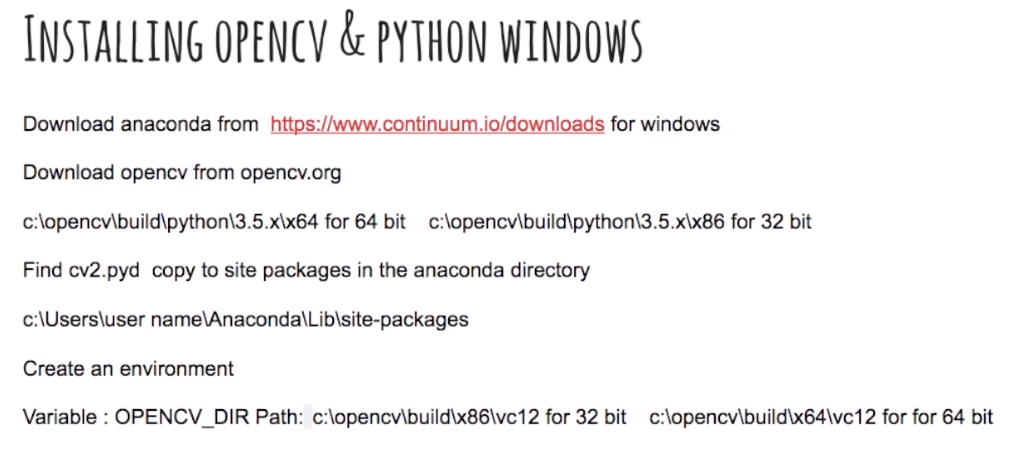

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading and writing 

In [2]:
# read image
img = cv2.imread("flower.jpg")
cv2.imshow("Original", img)
cv2.waitKey(0)
#program closes on pressing 0
cv2.destroyAllWindows()

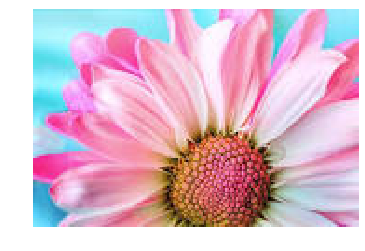

In [3]:
# same thing for matplotlib display
img = cv2.imread("flower.jpg")
plt.axis("off")
# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!
# This means that images are actually represented in BGR order rather than RGB!
# All we need to do is convert the image from BGR to RGB:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

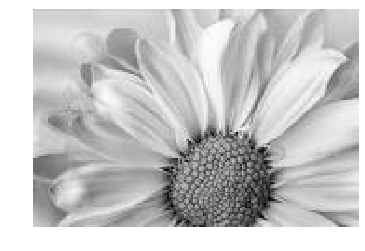

In [4]:
# read image as gray
img = cv2.imread("flower.jpg", 0)
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.show()

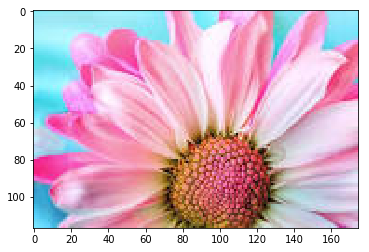

In [5]:
# read image with full colours
img = cv2.imread("flower.jpg", 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

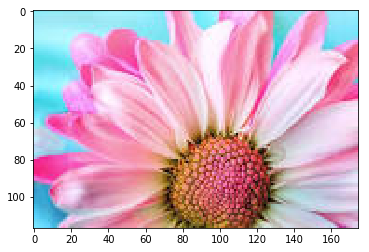

In [6]:
# same with argument below 0
img = cv2.imread("flower.jpg", -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# writing as png
cv2.imwrite("flower.png", img)

True

# JPG(jay-peg) / PNG(ping)

Some quality is compromised when an image is converted to a JPG. The reason is because the compression is lossy, which means that certain unnecessary information is permanently deleted. A JPG does, however, allow you to create smaller file size than you could with a PNG.

# shapes

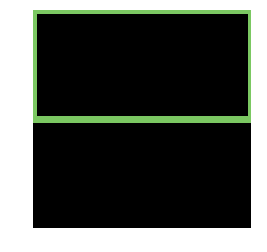

In [8]:
# retangle
pic = np.zeros((500, 500, 3), dtype="uint8")
cv2.rectangle(pic, (0,0), (500,250), (123, 200, 98), 16, lineType=8, shift=0)
plt.axis("off")
plt.imshow(pic)
plt.show()


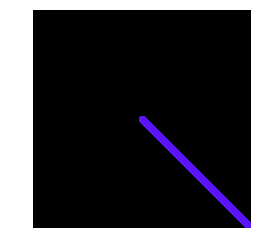

In [9]:
#line
pic = np.zeros((500, 500, 3), dtype="uint8")
cv2.line(pic, (250, 250), (500, 500), (92,20,255), 16)
plt.axis("off")
plt.imshow(pic)
plt.show()

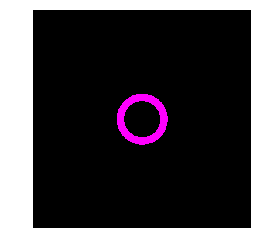

In [10]:
pic = np.zeros((500, 500, 3), dtype="uint8")
cv2.circle(pic, (250, 250), 50, (255,0,255), 16)
plt.axis("off")
plt.imshow(pic)
plt.show()

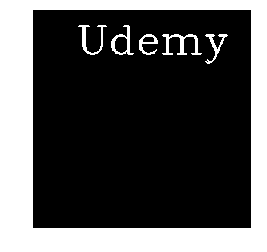

In [11]:
pic = np.zeros((500, 500, 3), dtype="uint8")
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(pic, "Udemy", (100, 100), font, 3, (255,255,255), 4, cv2.LINE_8)
plt.axis("off")
plt.imshow(pic)
plt.show()

# Image Transformation

### Translation

In [12]:
pic = cv2.imread("flower.jpg")

In [13]:
cols = pic.shape[1]
cols

175

In [14]:
rows = pic.shape[0]
rows

117

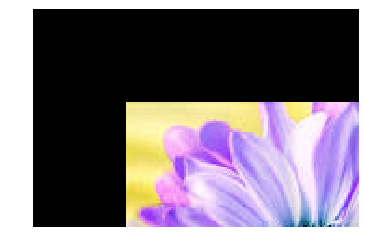

In [15]:
# translation matrix is defined as floating point array
M = np.float32([[1,0,50],[0,1,50]])
# shift 150 pixels along X axis
# shift 70 pixels down along Y axis
#negative numbers would do the opposite
shifted = cv2.warpAffine(pic, M, (cols, rows)) # takes care of shifting
plt.axis("off")
plt.imshow(shifted)
plt.show()

### Rotate Image

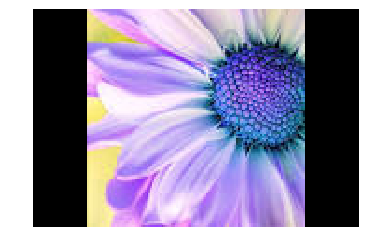

In [16]:
center = (cols/2, rows/2)
angle = 90
M = cv2.getRotationMatrix2D(center, angle, 1)
rotate = cv2.warpAffine(pic, M, (cols, rows))
plt.axis("off")
plt.imshow(rotate)
plt.show()

### Image Thresholding

In [17]:
# define a number. pixel values below it turn to 0, meaning black, and above turn white.
pic = cv2.imread("flower.jpg", 0)
threshold_value = 200
(T_value, binary_threshold) = cv2.threshold(pic, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary", binary_threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

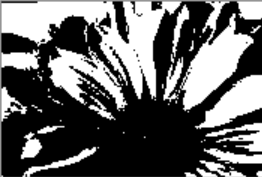

# Image Filtering

### Gaussian Blur

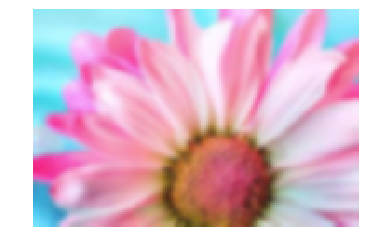

In [18]:
pic = cv2.imread("flower.jpg")
matrix = (7,7)
blur = cv2.GaussianBlur(pic, matrix,0)
plt.axis("off")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

#### Kernel / Gaussian Kernel 

Specifically, a Gaussian kernel (used for Gaussian blur) is a square array of pixels where the pixel values correspond to the values of a Gaussian curve (in 2D).

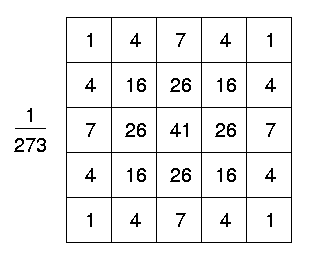

Each pixel in the image gets multiplied by the Gaussian kernel. This is done by placing the center pixel of the kernel on the image pixel and multiplying the values in the original image with the pixels in the kernel that overlap. The values resulting from these multiplications are added up and that result is used for the value at the destination pixel. Looking at the image, you would multiply the value at (0,0) in the input array by the value at (i) in the kernel array, the value at (1,0) in the input array by the value at (h) in the kernel array, and so on. and then add all these values to get the value for (1,1) at the output image.

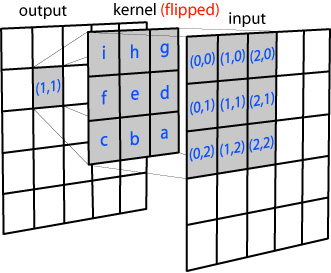

### Median Blur

In [19]:
pic = cv2.imread("1_61.jpg")
kernel = 3
median = cv2.medianBlur(pic, kernel)
cv2.imshow("original", pic)
cv2.imshow("median", median)
cv2.waitKey(0)
cv2.destroyAllWindows()

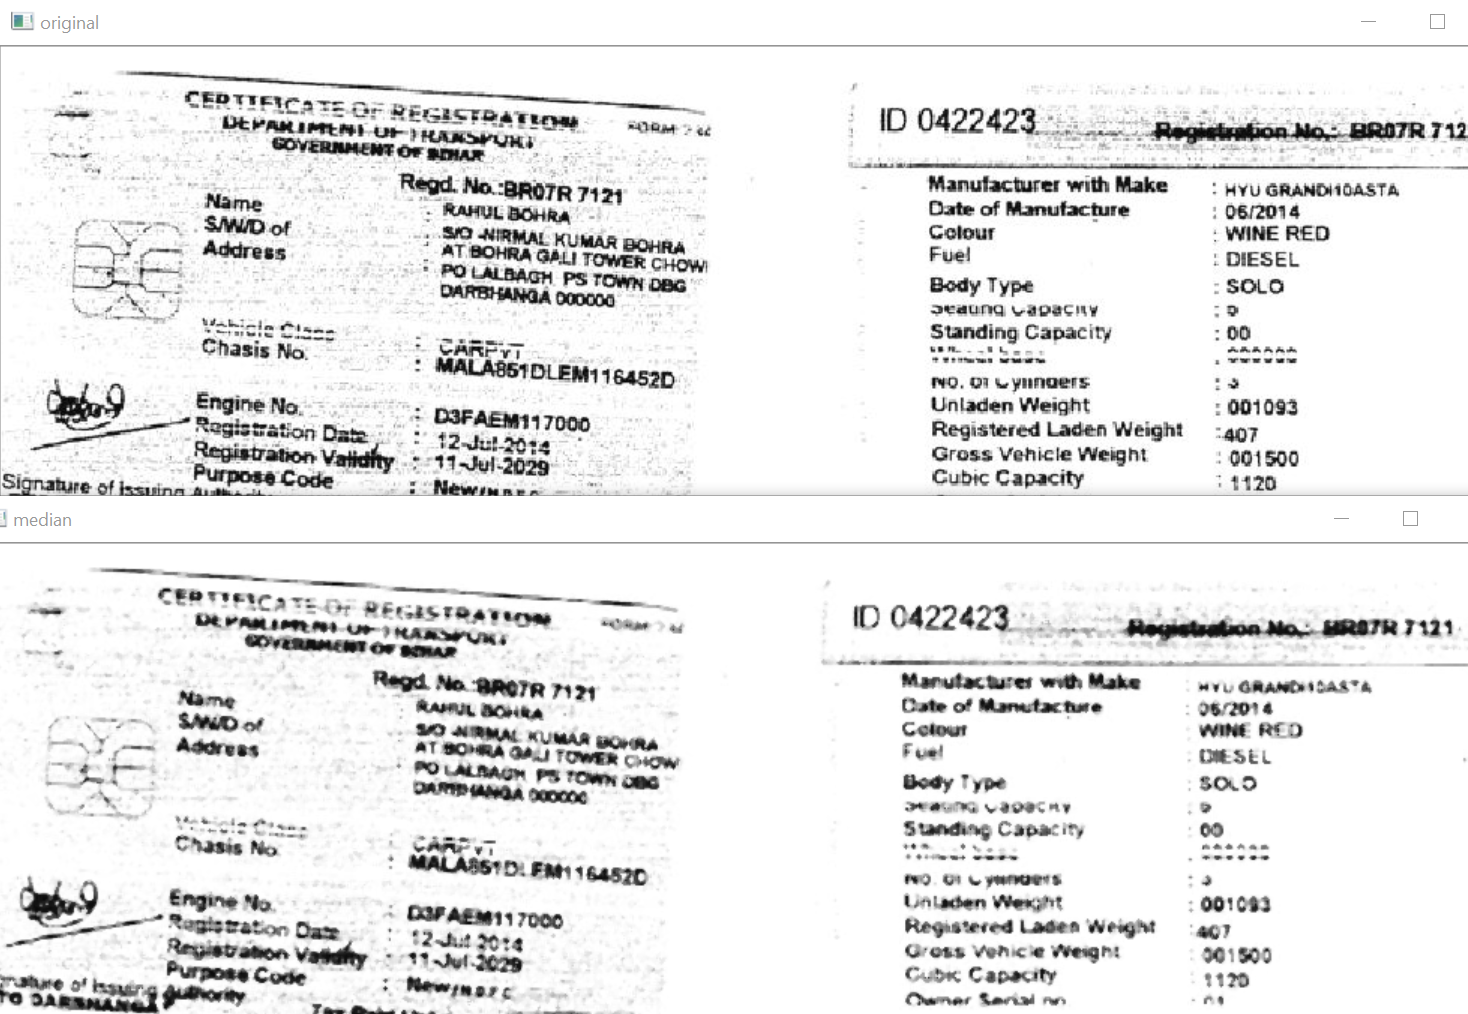

### Bilateral Filter

Earlier functions made images clear and smooth. But sometimes we loose some of the details in the image like edges. Bilateral function helps us to preserve those edges. 

This function has setbacks of noise + is slow

In [20]:
dimpixel = 7
color = 100
space = 100

In [21]:
filter = cv2.bilateralFilter(pic, dimpixel, color, space)

In [22]:
cv2.imshow("original", pic)
cv2.imshow("filter", filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

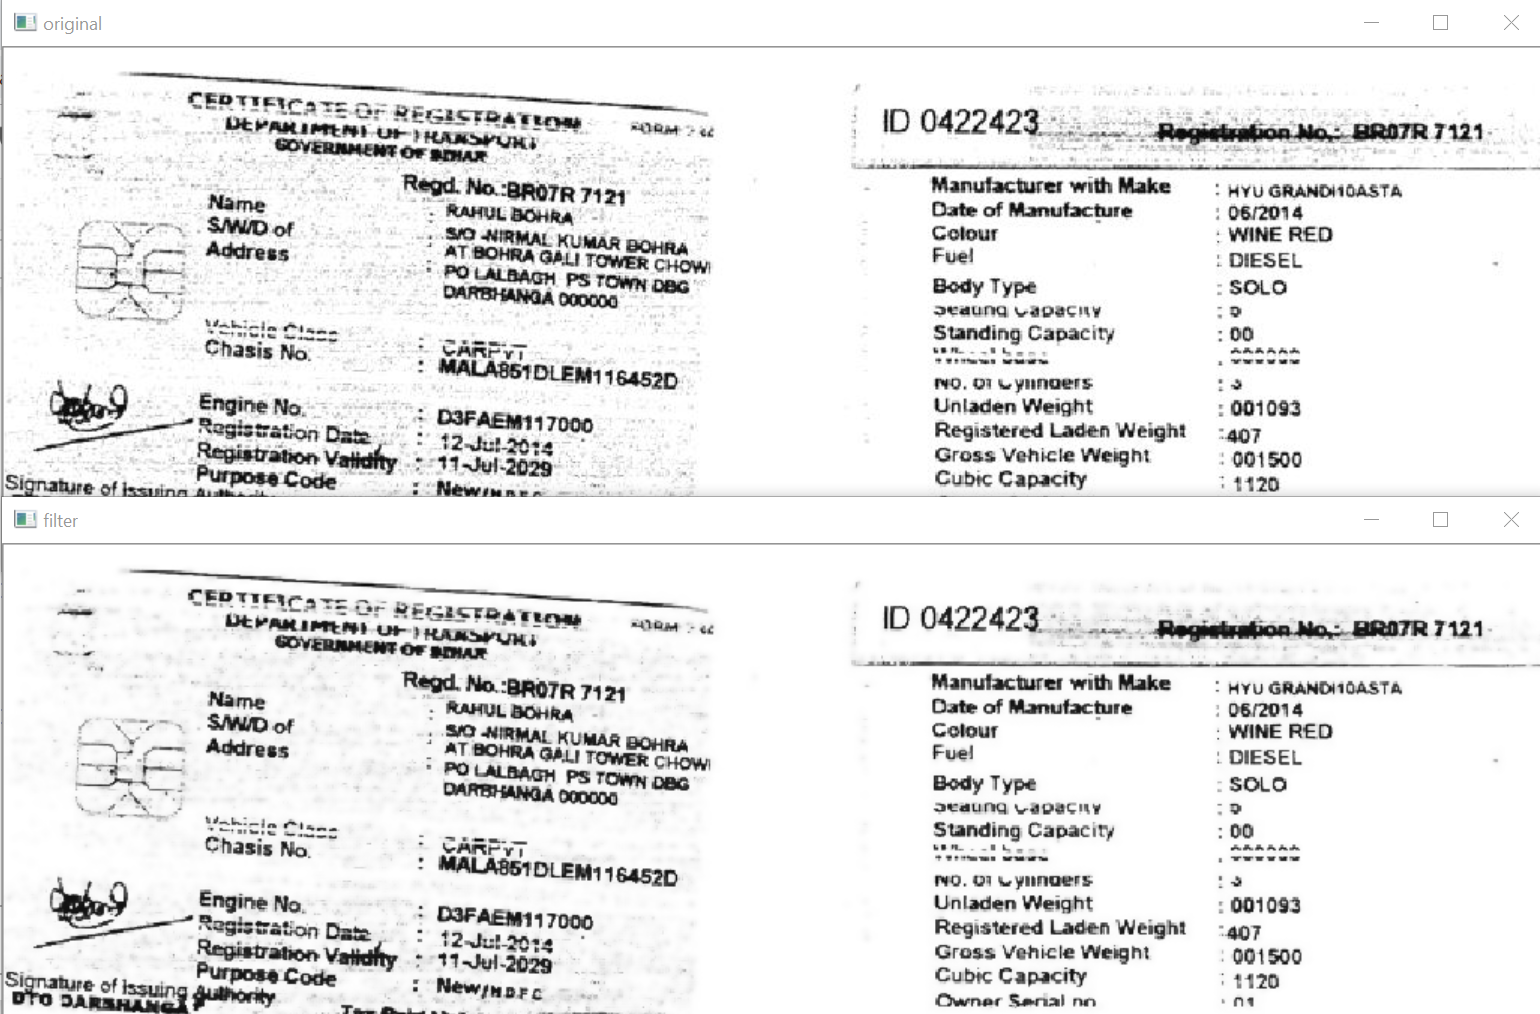

# Feature Detection

### Canny Edge Detector

In [24]:
pic = cv2.imread("flower.jpg")
thresholdval1 = 50
thresholdval2 = 100
canny = cv2.Canny(pic, thresholdval1, thresholdval2)
cv2.imshow("canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

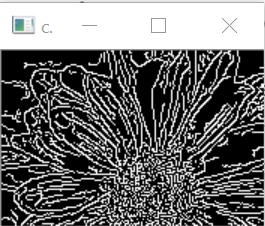

# Video Analysis

### Stream a video

In [2]:
cap = cv2.VideoCapture("sample_video.mp4")
while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow("vid", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Save Video in different format

In [3]:
cap = cv2.VideoCapture("sample_video.mp4")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
framesize = (720, 480)
out = cv2.VideoWriter("sample.avi", fourcc, fps, framesize)

# Applications

### Image Face Detection

We are going to use pretrained cascade classifier found in opencv. But if we want to build our own classifier, we have to take a lot of positive(having face) and negative(no face) images. And then extract features based on that dataset and train our classifier. 

In [2]:
import os
os.environ["OPENCV_VIDEOIO_PRIORITY_MSMF"] = "0" 

In [3]:
face_cascade = cv2.CascadeClassifier("D:\\opencv\\haarcascade_frontalface_default.xml")

In [5]:
videocapture = cv2.VideoCapture(0)
scale_factor = 1.3
while 1:
    ret, pic = videocapture.read()
    faces = face_cascade.detectMultiScale(pic, scale_factor, 5)
    for(x, y, w, h) in faces: 
        cv2.rectangle(pic, (x,y), (x+w, y+h), (255, 0, 0), 2)
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(pic, "Me", (x, y), font, 2, (255, 255, 255), 2, cv2.LINE_AA)
    #print("Number of faces found : {}".format(len(faces)))
    cv2.imshow("face", pic)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
videocapture.release()